## Model Pre - Processing

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score ,  explained_variance_score

# Load the dataset
file_path = 'historical_farm_data_tamil_nadu.csv'
data = pd.read_csv(file_path)

# Encode categorical features

for column in ['crop_type', 'growth_stage', 'soil_type']:
    le = LabelEncoder()
    data[column + '_encoded'] = le.fit_transform(data[column])
    
# Select features and target variable
features = ['soil_moisture', 'temperature', 'humidity', 'rain_forecast', 
            'crop_type_encoded', 'growth_stage_encoded', 'soil_type_encoded']
X = data[features]
y = data['water_demand']



## Model Training

In [13]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=150, random_state=17)
model.fit(X_train_scaled, y_train)



RandomForestRegressor(n_estimators=150, random_state=17)

## Model Testing

In [16]:
# Predict water demand for all farms

y_pred = model.predict(X_test_scaled)

data['predicted_water_demand'] = model.predict(scaler.transform(X))


## Model Evaluation

In [18]:
# Evaluate the model# Predict water demand for all farms

print(f"Model R^2 Score: {r2_score(y_test, y_pred):.4f}")

print(f"explained_variance_score : {explained_variance_score(y_test,y_pred):.4f}")


Model R^2 Score: 0.8788
explained_variance_score : 0.8788


## Model Performance Visualisation

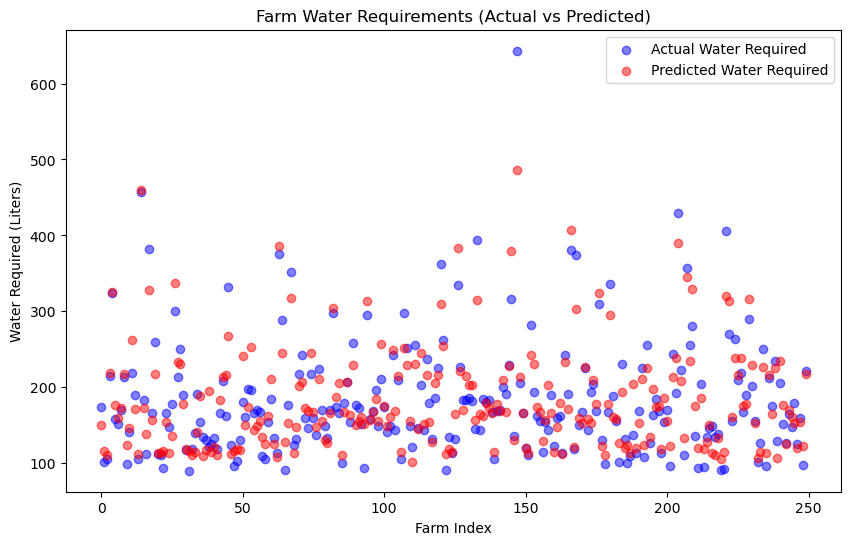

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a plot of predicted water requirements vs actual water requirements
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test[:250])), y_test[:250], color='blue', label='Actual Water Required', alpha=0.5)
plt.scatter(range(len(y_pred[:250])), y_pred[:250], color='red', label='Predicted Water Required', alpha=0.5)
plt.title('Farm Water Requirements (Actual vs Predicted)')
plt.xlabel('Farm Index')
plt.ylabel('Water Required (Liters)')
plt.legend()
plt.show()